In [1]:
%matplotlib inline
import numpy as np
import os
import json
import cPickle as pickle
from matplotlib import pyplot as plt
import seaborn as sns
import scipy

In [2]:
root_direc = '/Users/nicolasquach/Documents/stanford/honors_thesis/keio_screen_data'
pkl_direc = os.path.join(root_direc, 'all_data_pkl')
datatxt_direc = os.path.join(root_direc, 'datatxt')

In [4]:
all_data_file = open(os.path.join(pkl_direc, 'all_pooled_data.pkl'),'r')
classified_data_file = open(os.path.join(pkl_direc, 'all_pooled_classified_data.pkl'),'r')
all_data_dict = pickle.load(all_data_file)
classified_dict = pickle.load(classified_data_file)

In [5]:
all_data_keys = list(all_data_dict.keys())
classified_keys = list(classified_dict.keys())

In [6]:
gene_name = 'pdhR'
unclassified = []
classified = []

In [7]:
if (gene_name in all_data_keys) and (gene_name in classified_keys):
    unclassified = list(all_data_dict[gene_name])
    classified = list(classified_dict[gene_name])
else:
    print gene_name, ' not in dataset!' 

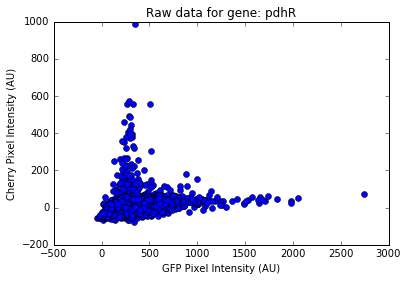

In [9]:
plt.plot(list(unclassified[0]),list(unclassified[1]),'o')
plt.xlabel('GFP Pixel Intensity (AU)')
plt.ylabel('Cherry Pixel Intensity (AU)')
plt.title('Raw data for gene: ' + gene_name)


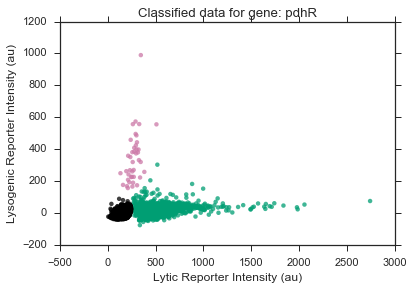

In [10]:
sns.set_context('notebook', font_scale = 1.1)
sns.set_style('white')
sns.set_style('ticks')
sky_blue = (86./255., 180./255., 233./255.)
bluish_green = (0, 158./255., 115./255.)
reddish_purple = (204./255.,121./255.,167./255.)
black = (0.,0.,0.)
lytic = zip(*classified[0])
lyso = zip(*classified[1])
uninfected = zip(*classified[2])
if len(lytic[0]) > 0:
    plt.scatter(lytic[0], lytic[1], c = bluish_green, alpha = 0.75, edgecolors = 'none')
if len(lyso[0]) > 0:
    plt.scatter(lyso[0], lyso[1], c = reddish_purple, alpha = 0.75, edgecolors = 'none')
if len(uninfected[0]) > 0:
    plt.scatter(uninfected[0], uninfected[1], c = black, alpha = 0.75, edgecolors = 'none')
plt.xlabel('Lytic Reporter Intensity (au)')
plt.ylabel('Lysogenic Reporter Intensity (au)')
plt.title('Classified data for gene: ' + gene_name)
    

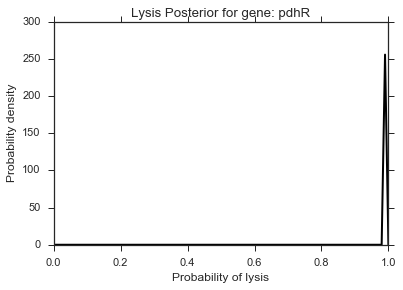

In [11]:
n_lytic = len(lytic[0])
n_lyso = len(lyso[0])
n_uninfected = len(uninfected[0])
n_infected = n_lytic + n_lyso
total_cells = len(unclassified[0])
x = np.linspace(0,1,100)
lysis_post = scipy.stats.beta.pdf(x, 1+n_lytic, 1+n_lyso)
plt.plot(x, lysis_post, color = 'k', linewidth = 2)
plt.xlim([0,1])
plt.xlabel('Probability of lysis')
plt.ylabel('Probability density')
plt.title('Lysis Posterior for gene: ' + gene_name)

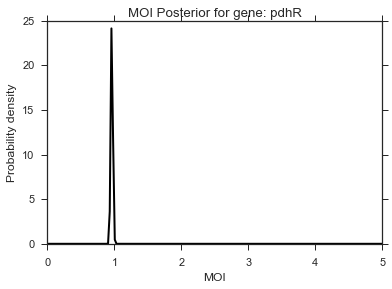

In [12]:
x = np.linspace(0,5,200)
gamma = np.float(total_cells)*np.log(1-1/np.float(total_cells))
MOI_post = np.abs(gamma*np.exp(gamma*x))*scipy.stats.beta.pdf(np.exp(gamma*x), 1+total_cells-n_infected, 1+n_infected)
plt.plot(x, MOI_post, color = 'k', linewidth = 2)
plt.xlabel('MOI')
plt.ylabel('Probability density')
plt.title('MOI Posterior for gene: ' + gene_name)

In [13]:
frac_infected = 0
if total_cells > 0:
    frac_infected = float(n_infected)/float(total_cells)
a = float(1+n_lytic)
b = float(1+n_lyso)
mode = 0.5
if (a+b)>2:
    mode = (a-1)/(a+b-2)
var = a*b/(np.square(a+b)*(a+b+1))
print 'Summary of cell fate statistics'
print 'Number of lytic events: '+str(n_lytic)
print 'Number of lysogenic events: ' + str(n_lyso)
print 'Total number of infections: ' + str(n_infected)
print 'Total cells sampled: ' + str(total_cells)
print 'Fraction infected: ' + str(frac_infected)

Summary of cell fate statistics
Number of lytic events: 4054
Number of lysogenic events: 41
Total number of infections: 4095
Total cells sampled: 6634
Fraction infected: 0.617274645764
